 ## ADAGRAD ##
 
 GROUPE N°6

1.   21S2802    NYA NJIKE ARMEL   

2.   21S2810    KAPATA NGANKAM DARLIN CANIS

3.   18T2769    TAKOU NOUMBISSI JOEL BRWONDON

4.   21S2811    FOTSING WAFFEU VADINY PHERLIN


## AMELIORATION DE L'ALGORITHME DE DESCENTE DU GRADIENT ##

Dans SGD et mini-batch SGD, la valeur de η utilisée pour chaque poids, ou disons pour chaque paramètre. Ce qui n'est pas bon pour l'apprentissage.

## INTUITION ##

Adagrad signifie Adaptive Gradient Optimizer. Il y avait des optimiseurs comme Gradient Descent, Stochastic Gradient Descent, mini-batch SGD, tous ont été utilisés pour réduire la fonction de perte par rapport aux poids. La formule de mise à jour du poids est la suivante:
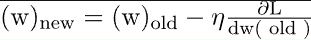

Basée sur des itérations cette formule s'écrit :
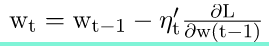 
où **w(t)** est la valeur de w à l'itération en cours, **w(t-1)** la valeur de w à l'itération précédente et **η** le taux d'apprentissage.

Dans **SGD** et **mini-batch SGD**, la valeur de η était la même pour chaque poids, ou disons pour chaque paramètre. Typiquement, η = 0,01 . 
Mais avec **Adagrad Optimizer**, l'idée centrale est que chaque poids a un taux d'apprentissage (η) différent...

In [ ]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


##FORMULATION MATHÉMATIQUE

La nouvelle formule de la mise à jour du poids pour **Adagrad Optimizer** est :
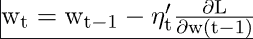 

avec 
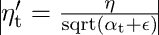

où **alpha(t)** dénote des taux d'apprentissage différent pour chaque poids à chaque itération.
Ici, η est un nombre constant, **epsilon** est un petit nombre de valeur positive pour éviter une erreur de division par zéro si dans le cas où **alpha(t)** devient 0 car si alpha(t) devient zéro alors le taux d'apprentissage deviendra zéro qui à son tour après multiplication par dérivée fera **w(old) = w(new)**, et cela conduira à une petite convergence.

On a:

 al.png


avec 

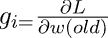

## IMPLÉMENTATION

**Gradient Descent Optimization With AdaGrad**

In [2]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = np.random.randn(500, 2)


In [4]:
theta = np.zeros(2)

In [6]:
def loss_function(data,theta):
    
    #get m and b
    m = theta[0]
    b = theta[1]
    
    loss = 0
    
    #on each data point 
    for i in range(0, len(data)):
        
        #get x and y
        x = data[i, 0]
        y = data[i, 1]
        
        #predict the value of y 
        y_hat = (m*x + b)
        
        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)
        
    #mean sqaured loss
    mean_squared_loss = loss / float(len(data))
        
    return mean_squared_loss

In [7]:
loss_function(data, theta)

1.0072317005282887

In [ ]:
def compute_gradients(data, theta):

    gradients = np.zeros(2)
    
    #total number of data points
    N = float(len(data))
    
    m = theta[0]
    b = theta[1]
    
    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
           
        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        
        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    
    #add epsilon to avoid division by zero error
    epsilon = 1e-6 
    gradients = np.divide(gradients, N + epsilon)

    return gradients